# Chapter 11. 머신러닝을 위한 데이터 준비

#### 데이터 분석을 위한 데이터 준비 단계
1. 데이터 불러오기
2. 데이터 살펴보기
3. 데이터 분할: train, test, validation ...
4. 데이터 변환: scale, normalize ...

### 1. 기본적인 데이터 분석을 위한 data set 불러오기 - boston
<br>
http://lib.stat.cmu.edu/datasets/boston
<br>
실제 데이터 분석에서는 파일, 데이터베이스 등 다양한 소스로부터 데이터를 불러 온다.

#### 보스톤 데이터셋과 문제점

- 1978년에 발표된 데이터로 미국 보스턴 지역의 주택 가격에 영향을 미치는 요소들을 정리
- scikit-learn에서 자체적으로 제공했으나 윤리적 문제로 인해 1.2부터 삭제됨
- 인종차별과 관련한 이슈가 있으며, 가급적 사용을 자제하도록 권고
- 그러나, 회귀분석과 관련해 데이터 관점에서 좋은 예를 보여주며 대체 데이터셋을 구하기 어려움
- 향후 적절한 데이터셋을 구하면 대체할 예정이며, 이러한 문제점을 이해하고 사용하기 바람

#### read_csv를 이용해 웹으로부터 데이터 불러오기

**제대로 된 데이터를 얻기 위해 해야 할 일**

- 텍스트 파일 살펴보기
  - 웹 주소로 들어가보면 윗 부분에 데이터에 대한 설명이 있고, 아래에는 데이터가 번갈아가면 있는 것을 볼 수 있음
  
```
 The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
 prices and the demand for clean air', J. Environ. Economics & Management,
 vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
 ...', Wiley, 1980.   N.B. Various transformations are used in the table on
 pages 244-261 of the latter.

 Variables in order:
 CRIM     per capita crime rate by town
 ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
 INDUS    proportion of non-retail business acres per town
 CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 NOX      nitric oxides concentration (parts per 10 million)
 RM       average number of rooms per dwelling
 AGE      proportion of owner-occupied units built prior to 1940
 DIS      weighted distances to five Boston employment centres
 RAD      index of accessibility to radial highways
 TAX      full-value property-tax rate per $10,000
 PTRATIO  pupil-teacher ratio by town
 B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 LSTAT    % lower status of the population
 MEDV     Median value of owner-occupied homes in $1000's

 0.00632  18.00   2.310  0  0.5380  6.5750  65.20  4.0900   1  296.0  15.30
  396.90   4.98  24.00
 0.02731   0.00   7.070  0  0.4690  6.4210  78.90  4.9671   2  242.0  17.80
  396.90   9.14  21.60
 0.02729   0.00   7.070  0  0.4690  7.1850  61.10  4.9671   2  242.0  17.80
  392.83   4.03  34.70
 0.03237   0.00   2.180  0  0.4580  6.9980  45.80  6.0622   3  222.0  18.70
  394.63   2.94  33.40
  ```

  - 텍스트 파일 분석 결과
    - 위에서부터 22줄은 필요 없는 내용: 따라서 22줄은 skip
    - 헤더(열 이름)이 없음: 컬럼명을 만들어줘야 함
    - 한 행이 두 줄로 번갈아가며 쓰여 있음: 두 줄을 합쳐서 하나의 행을 만들어야 함
    - 마지막 변수 MEDV가 target 변수이고 나머지가 input 변수임: 마지막 변수는 별도의 데이터 프레임으로 분리
    - 결과적으로 input 변수는 13개, target 변수는 1개


In [1]:
import numpy as np
import pandas as pd

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
C:\Users\user\AppData\Local\Temp\ipykernel_5572\3822840248.py:5: SyntaxWarning: invalid escape sequence '\s'
  raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)


In [2]:
print(data.shape, target.shape)

(506, 13) (506,)


In [3]:
feature_names = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']
len(feature_names)

13

### 2. 상관관계 분석

상관관계 분석은 두 변수 간의 선형적 관계를 파악하는 통계적 방법으로 주요 분석 방법은 다음과 같음

1. 피어슨 상관계수
    - 연속형 변수 간의 선형 관계를 측정
    - 정규분포를 가정하는 모수적 방법
    - -1에서 1 사이의 값을 가짐
2. 스피어만 상관계수
    - 순서형 변수나 비정규 분포 데이터에 사용
    - 순위를 이용해 계산

#### 분석 절차
1. 산점도 작성
    - 두 변수 간 관계를 시각적으로 파악
2. 상관계수 계산
    - 적절한 상관계수 방법 선택 및 계산
3. 통계적 유의성 검정
    - p-value를 통해 유의성 확인
4. 상관계수 해석
    - 상관계수의 크기와 방향 해석
    - 일반적으로 ±0.3 이상이면 뚜렷한 상관관계로 해석

- 상관분석 시 주의할 점은 인과관계를 의미하지 않으며, 비선형 관계는 포착하지 못함.<br>
- 충분한 표본 크기와 변량이 필요
- 상관계수와 함께 p-value를 확인하여 통계적 유의성을 판단할 필요가 있음

In [7]:
df_data = pd.DataFrame(data, columns=feature_names)
df_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
df_target = pd.DataFrame(target, columns=['MEDV'])
df_target.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [61]:
df = pd.concat([df_data, df_target], axis='columns')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.01,18.00,2.31,0.00,0.54,6.58,65.20,4.09,1.00,296.00,15.30,396.90,4.98,24.00
1,0.03,0.00,7.07,0.00,0.47,6.42,78.90,4.97,2.00,242.00,17.80,396.90,9.14,21.60
2,0.03,0.00,7.07,0.00,0.47,7.18,61.10,4.97,2.00,242.00,17.80,392.83,4.03,34.70
3,0.03,0.00,2.18,0.00,0.46,7.00,45.80,6.06,3.00,222.00,18.70,394.63,2.94,33.40
4,0.07,0.00,2.18,0.00,0.46,7.15,54.20,6.06,3.00,222.00,18.70,396.90,5.33,36.20


In [54]:
df.corr(method='pearson').round(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


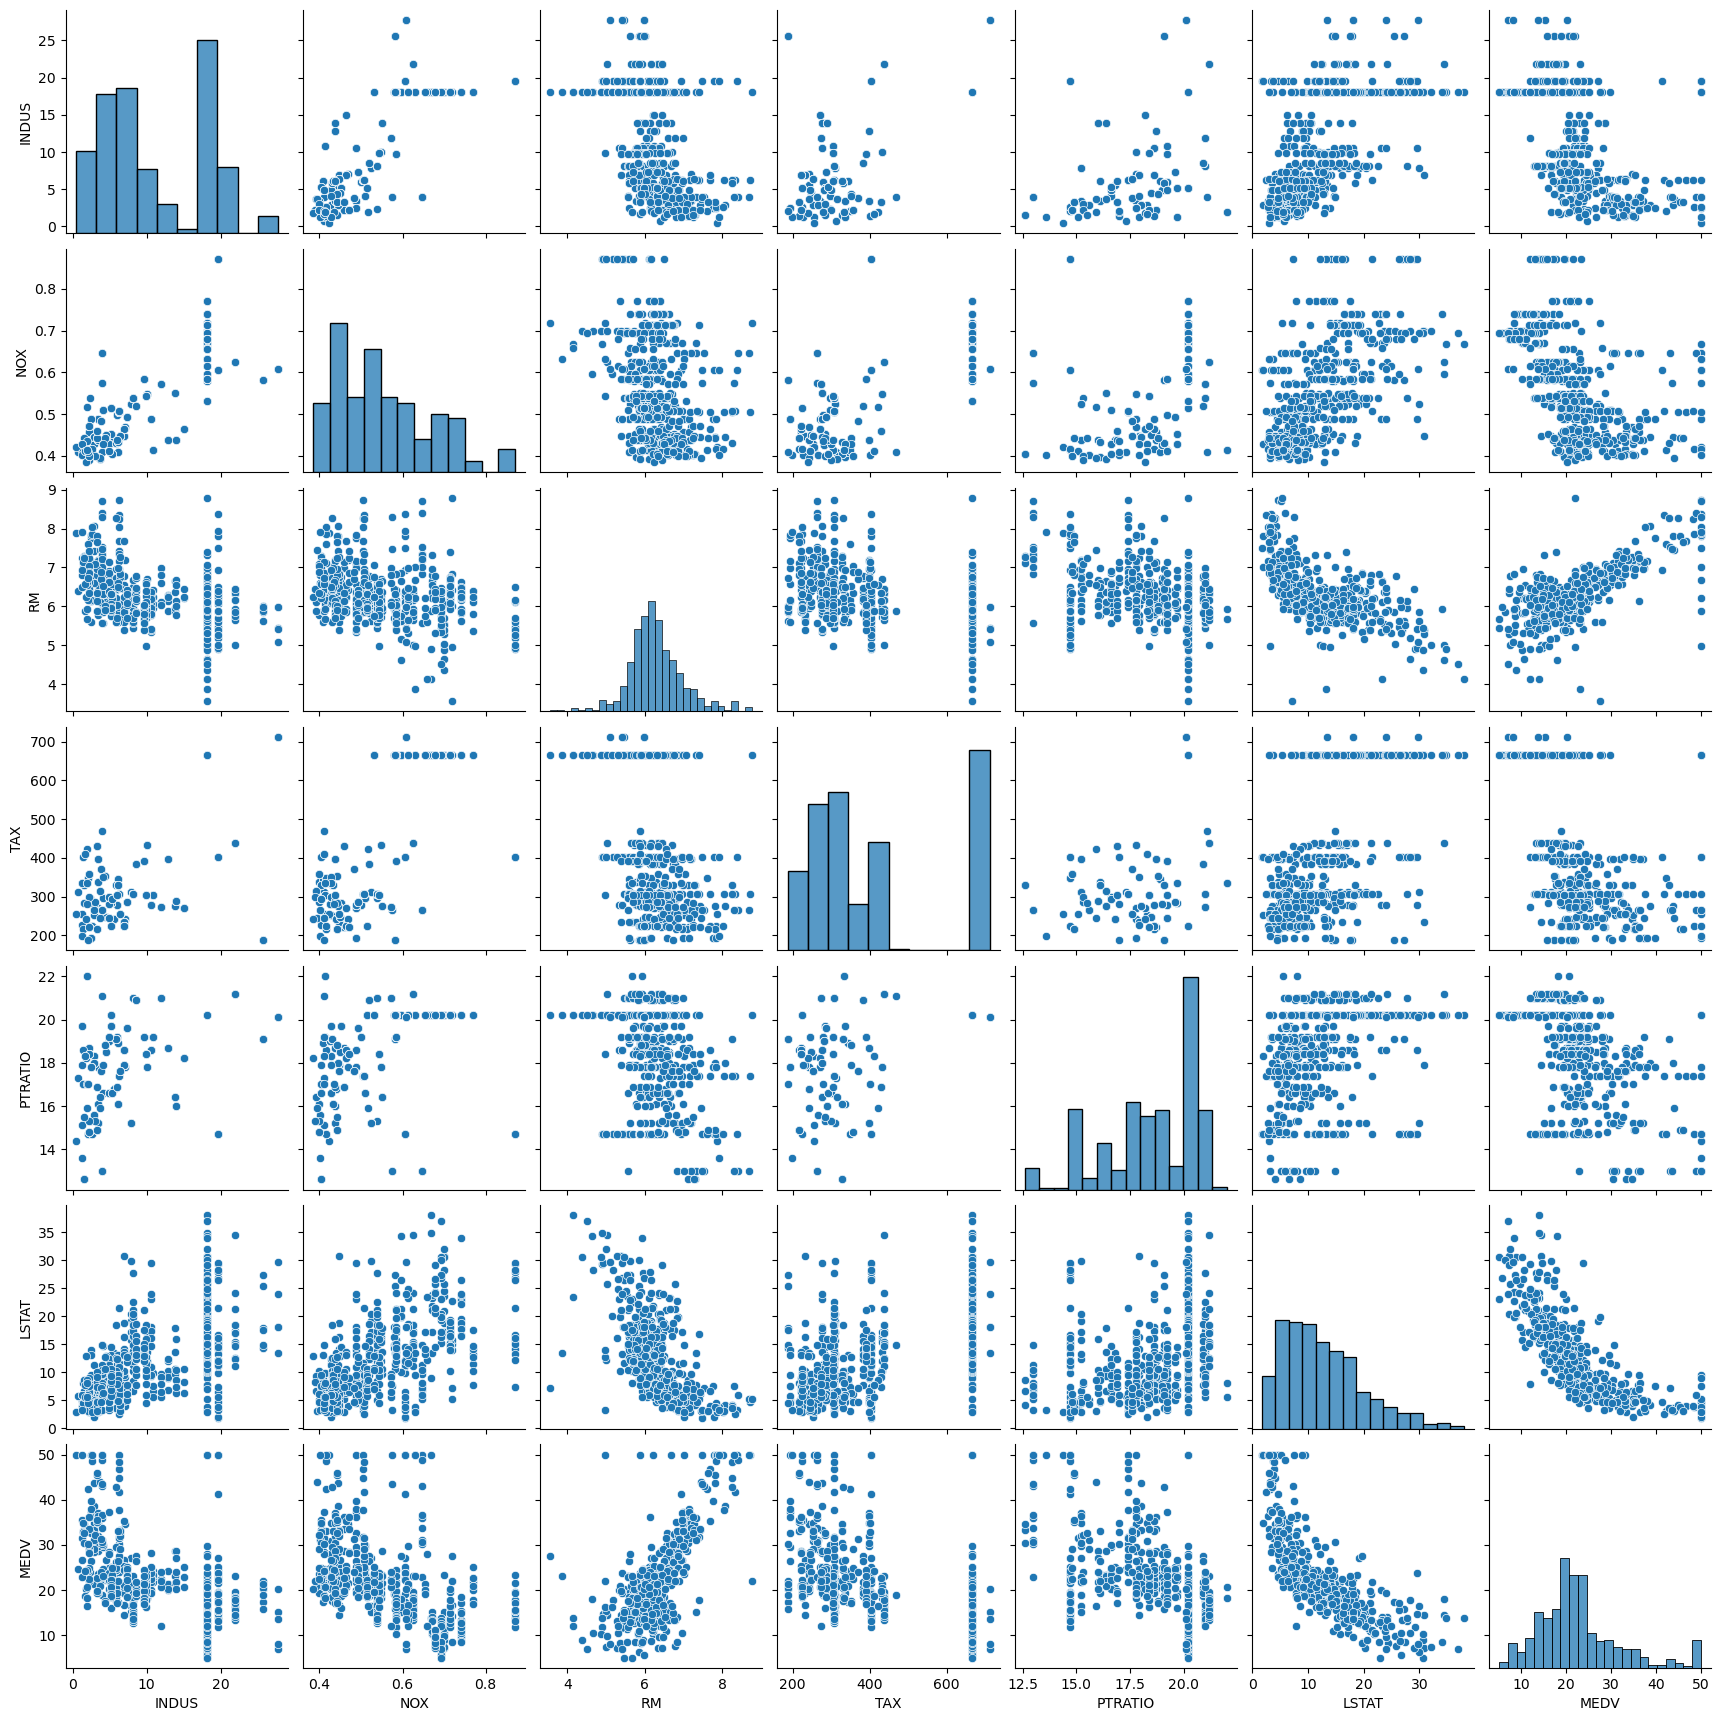

In [62]:
selected_features = ['INDUS',zzz'RM','TAX','PTRATIO','LSTAT','MEDV']
sns.pairplot(df[selected_features])
plt.show()

#### Heat Map

https://seaborn.pydata.org/generated/seaborn.heatmap.html



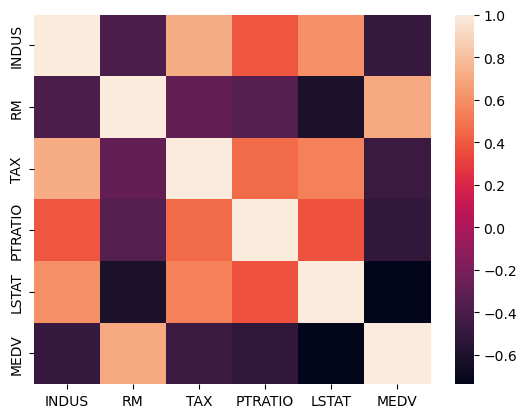

In [58]:
# heatmap by seaborn
import seaborn as sns

ax = sns.heatmap(df.corr(method='pearson'))
plt.show()

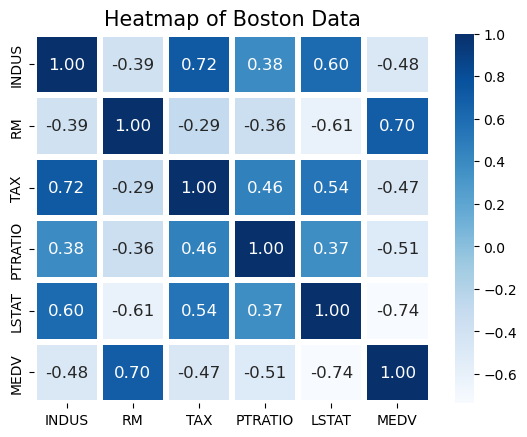

In [59]:
ax = sns.heatmap(df.corr(method='pearson'), cmap='Blues', annot=True, annot_kws={'size':12}, fmt='.2f', linewidths=3)
plt.title('Heatmap of Boston Data', fontsize=15)
plt.show()

### 3. 데이터 분할
<br>
목적: 학습용 데이터와 검증용 데이터로 분리해서 올바르게 학습되었는지 확인한다.
<br>
http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

<br>일반적으로 머신러닝은 학습용 데이터에 과적합되는 경향이 있다.
<br>즉, 학습용 데이터에서만 예측이 잘 되고 일반화는 잘 안되는 경향이 있다.
<br>극단적인 예를 들어, 키를 이용해서 몸무게를 예측하는 상황에서 만일 데이터에 키가 크고 마른 사람들과 키가 작고 뚱뚱한 사람들만 우연히 들어와있다면 이것으로 학습을 해봤자 일반적인 상황에는 잘 안 맞을 수 있다.
<br>그러나, 학습에 사용한 데이터에 대해서는 여전히 잘 맞는 것처럼 보인다.
<br>이와 같은 상황을 방지하기 위해서 데이터를 학습용과 검증용으로 나누어 사용하게 되고, 이 때 두 데이터 셋에는 값이 랜덤하게 들어가는 것이 중요하다.

<br>또한 data(독립변수)와 target(종속변수)는 반드시 짝을 맞춰서 나누어지고, 랜덤하게 섞여야 한다는 것을 기억해야 한다. 
<br>만일 짝이 틀려지면 전혀 의미없는 데이터가 된다.

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data, target, test_size=0.2) #test_size를 명시하지 않으면 0.25
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(404, 13) (404,)
(102, 13) (102,)


### 4. 데이터 변환 (표준화: Standardize features)
- http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

- 목적: 데이터 간 분포의 편차가 클 때, 이를 조정한다.
<br>
일반적으로는 feature 별(column별)로 독립적으로 수행하나, 상황에 따라 같은 sample 내(row별)에서 수행할 수도 있다.
<br>
상황에 따라서 수행여부 선택: 에러가 발생하거나 예측률을 향상시키고자 할 때 수행, 본 수업에서는 특별한 언급이 없으면 하지 않는다.
<br> 더 정확히 이야기하면, 사용하는 알고리즘에 따라 데이터에 대한 민감도가 다르다.<br> 예를 들어 SVM 같은 경우 각 변수 별로 분포의 편차가 크면 성능이 떨어지는 경향이 있으므로 가급적 표준화를 하는 것이 좋다. <br>실제로 결과를 비교해 보면 표준화를 하는 쪽이 성능이 우수한 경우가 많다.

- 주의사항: train과 test set 전체에 대해 fit을 하고 나눠서 사용한다고 생각할 수도 있으나, 원칙적으로 반드시 train data에 대해서만 fit을 하고 이 scaler를 이용해 test data를 transform하는 것이 정확하다.

In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(X_train)) #X_train set을 대상으로 평균, 표준편차를 계산
print('scaler mean:', scaler.mean_)
print('scaler variance:', scaler.var_)

print('--- train data before scaling ---')
print(X_train[0])
scaled_X_train = scaler.transform(X_train) #계산된 평균, 표준편차를 이용하여 train set의 값을 변환
print('--- train data after scaling ---')
print(scaled_X_train[0].round(2))

scaled_X_test = scaler.transform(X_test) #계산된 평균, 표준편차를 이용하여 test set의 값을 변환, 
# train set과 동일한 값으로 변환하는 것에 유의
print('--- test data after scaling ---')
print(scaled_X_test[0].round(2))

StandardScaler()
scaler mean: [3.74597562e+00 1.13316832e+01 1.11174257e+01 7.92079208e-02
 5.54912871e-01 6.28260891e+00 6.83091584e+01 3.74257450e+00
 9.64851485e+00 4.09611386e+02 1.84341584e+01 3.57266163e+02
 1.27373020e+01]
scaler variance: [8.10375499e+01 5.57756323e+02 4.60024939e+01 7.29340261e-02
 1.34793679e-02 4.90551357e-01 7.67903159e+02 4.17786279e+00
 7.60200225e+01 2.85626188e+04 4.67719954e+00 7.95366238e+03
 5.21268682e+01]
--- train data before scaling ---
[1.5380e-02 9.0000e+01 3.7500e+00 0.0000e+00 3.9400e-01 7.4540e+00
 3.4200e+01 6.3361e+00 3.0000e+00 2.4400e+02 1.5900e+01 3.8634e+02
 3.1100e+00]
--- train data after scaling ---
[-0.41  3.33 -1.09 -0.29 -1.39  1.67 -1.23  1.27 -0.76 -0.98 -1.17  0.33
 -1.33]
--- test data after scaling ---
[ 0.61 -0.48  1.03 -0.29  0.66 -0.1   1.14 -1.26  1.65  1.52  0.82  0.1
 -0.44]


In [43]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
print(scaler.fit(X_train)) #X_train set을 대상으로 평균, 표준편차를 계산
print('scaler data min:', scaler.data_min_)
print('scaler data max:', scaler.data_max_)

print('--- train data before scaling ---')
print(X_train[0])
scaled_X_train = scaler.transform(X_train) #계산된 평균, 표준편차를 이용하여 train set의 값을 변환
print('--- train data after scaling ---')
print(scaled_X_train[0].round(2))

scaled_X_test = scaler.transform(X_test) #계산된 평균, 표준편차를 이용하여 test set의 값을 변환, 
# train set과 동일한 값으로 변환하는 것에 유의
print('--- test data after scaling ---')
print(scaled_X_test[0].round(2))

MinMaxScaler()
scaler data min: [9.0600e-03 0.0000e+00 4.6000e-01 0.0000e+00 3.8500e-01 3.5610e+00
 2.9000e+00 1.1296e+00 1.0000e+00 1.8700e+02 1.2600e+01 2.5200e+00
 1.7300e+00]
scaler data max: [ 88.9762 100.      27.74     1.       0.871    8.725  100.      12.1265
  24.     711.      22.     396.9     37.97  ]
--- train data before scaling ---
[1.5380e-02 9.0000e+01 3.7500e+00 0.0000e+00 3.9400e-01 7.4540e+00
 3.4200e+01 6.3361e+00 3.0000e+00 2.4400e+02 1.5900e+01 3.8634e+02
 3.1100e+00]
--- train data after scaling ---
[0.   0.9  0.12 0.   0.02 0.75 0.32 0.47 0.09 0.11 0.35 0.97 0.04]
--- test data after scaling ---
[0.1  0.   0.65 0.   0.51 0.51 1.   0.   1.   0.91 0.81 0.92 0.22]
